In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
print(df.columns.tolist())

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [43]:
df['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [44]:
titanic  = df[['survived','pclass','sex','age','sibsp','parch','fare','embark_town','alone','deck']].copy()

finding missing value

<Axes: >

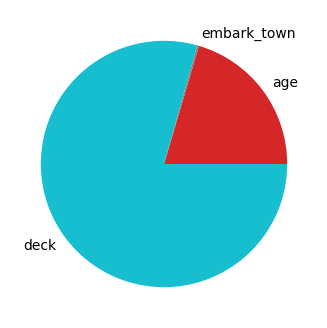

In [45]:
titanic.isnull().sum().plot(kind='pie' , figsize=(8,4))

In [46]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
alone            0
deck           688
dtype: int64

fix missing value
- numeric mean 
- categorical mean

In [47]:
avg_age = round(titanic['age'].mean())
print(f'Average age:{avg_age:.1f}')

Average age:30.0


In [48]:
df['age'].fillna(avg_age, inplace=True)

In [49]:
# most frequent value in embark_town column
titanic['embark_town'].value_counts().idxmax()

'Southampton'

In [50]:
most_freq_embark_town = titanic['embark_town'].value_counts().idxmax()
titanic['embark_town'].fillna(most_freq_embark_town, inplace = True)

In [51]:
titanic['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [52]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [53]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      0
alone            0
deck           688
dtype: int64

selection of column based on datatype

In [54]:
# only numerical column from titanic dataframe
df.select_dtypes(include=np.number)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [55]:
# textual columns from titanic dataframe
df.select_dtypes(include=object)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [56]:
# boolean columns from titanic dataframe
titanic.select_dtypes(include=bool)

,alone
0,False
1,False
2,True
3,False
4,True
...,...
886,True
887,True
888,False
889,True


describing data in  terms of mean, mode, median, standard deviation,min,max etc. 

In [57]:
titanic.describe(include=[object,bool])

,sex,embark_town,alone
count,891,891,891
unique,2,3,2
top,male,Southampton,True
freq,577,646,537


In [58]:
# group by pblass and count total survived
titanic.groupby(['pclass','survived']).groups

{(1, 0): [6, 27, 30, 34, 35, 54, 62, 64, 83, 92, 96, 102, 110, 118, 124, 137, 139, 155, 168, 170, 174, 177, 185, 245, 252, 262, 263, 270, 273, 284, 295, 297, 331, 332, 336, 339, 351, 373, 377, 434, 438, 452, 456, 462, 467, 475, 487, 492, 493, 498, 505, 515, 527, 536, 544, 545, 555, 557, 583, 602, 625, 633, 659, 662, 671, 694, 698, 711, 741, 745, 748, 766, 782, 789, 793, 806, 815, 822, 867, 872], (1, 1): [1, 3, 11, 23, 31, 52, 55, 61, 88, 97, 136, 151, 166, 187, 194, 195, 209, 215, 218, 224, 230, 248, 256, 257, 258, 268, 269, 275, 290, 291, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 334, 337, 341, 356, 366, 369, 370, 375, 380, 383, 390, 393, 412, 430, 435, 445, 447, 449, 453, 457, 460, 484, 486, 496, 504, 507, 512, 513, 520, 523, 537, 539, 540, 550, 556, 558, 571, 572, 577, 581, 585, 587, 591, 599, 604, 607, 609, 621, 627, 630, 632, 641, 645, 647, 660, 669, 679, 681, ...], (2, 0): [20, 33, 41, 70, 72, 99, 117, 120, 122, 134, 135, 144, 145, 148, 149, 150, 178, 181, 191, 

In [59]:
# group pclass and cpount total survived
titanic.groupby(['pclass','survived']).count()

sex  age  sibsp  parch  fare  embark_town  alone  deck
pclass survived                                                        
1      0          80   64     80     80    80           80     80    58
       1         136  122    136    136   136          136    136   117
2      0          97   90     97     97    97           97     97     3
       1          87   83     87     87    87           87     87    13
3      0         372  270    372    372   372          372    372     6
       1         119   85    119    119   119          119    119     6

In [60]:
# groupby sex and count total survived
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [61]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [62]:
titanic.sort_values(by='age',ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,deck
630,1,1,male,80.0,0,0,30.0000,Southampton,True,A
851,0,3,male,74.0,0,0,7.7750,Southampton,True,NaN
493,0,1,male,71.0,0,0,49.5042,Cherbourg,True,NaN
96,0,1,male,71.0,0,0,34.6542,Cherbourg,True,A
116,0,3,male,70.5,0,0,7.7500,Queenstown,True,NaN
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,Cherbourg,True,NaN
863,0,3,female,NaN,8,2,69.5500,Southampton,False,NaN
868,0,3,male,NaN,0,0,9.5000,Southampton,True,NaN
878,0,3,male,NaN,0,0,7.8958,Southampton,True,NaN
